>
> # MaaS Sim tutorial
>
> ## Synthetic demand generation
>
-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [19]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [20]:
import MaaSSim.utils
from MaaSSim.data_structures import structures as inData

In [21]:
params = MaaSSim.utils.get_config('../../data/config/default.json')  # load configuration

In [22]:
inData = MaaSSim.utils.load_G(inData, params) #download_G(inData) # download the graph for the 'p

### Syntehtic demand parameterization

In [23]:
params.nP = 100 #number of passengers

In [24]:
params.city

'Nootdorp, Netherlands'

In [25]:
params.simTime #demand simulation time [hours]

1

In [26]:
params.t0 #midpoint of simulated period

Timestamp('2022-12-13 02:08:45')

In [27]:
params.demand_structure

DotMap(origins_dispertion=-0.0003, destinations_dispertion=-0.001, temporal_dispertion=0.3, temporal_distribution='uniform', _ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

### Synthetic demand generation

In [28]:
inData = MaaSSim.utils.generate_demand(inData, params)

           pos event platforms learning  rh_U     u_PT
0   2014445729   NaN       NaN       on   0.5 -5.18125
1     44996092   NaN       NaN       on   0.5 -6.00500
2   1619407431   NaN       NaN       on   0.5 -3.99250
3   3445597526   NaN       NaN       on   0.5 -9.04875
4     45026903   NaN       NaN       on   0.5 -4.74750
..         ...   ...       ...      ...   ...      ...
95    44975595   NaN       NaN       on   0.5 -3.80375
96   472323871   NaN       NaN       on   0.5 -5.19000
97    44994287   NaN       NaN       on   0.5 -6.12875
98  2273226088   NaN       NaN       on   0.5 -4.72500
99    45017056   NaN       NaN       on   0.5 -4.43125

[100 rows x 6 columns]


In [37]:
from pathlib import Path  
filepath = Path('../Coevolution_Experiments/Nootdorp_requests.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
inData.requests.to_csv(filepath, index=False)

In [30]:
inData.requests[['origin','destination','treq']].head(10)

,origin,destination,treq
0,4290089184,44991820,2022-12-13 01:38:48
1,519520392,1432312436,2022-12-13 01:39:16
2,550771744,4290089182,2022-12-13 01:39:24
3,44983951,44984373,2022-12-13 01:39:57
4,2802457901,44985747,2022-12-13 01:40:33
5,520831192,550771714,2022-12-13 01:40:40
6,1402795367,45007585,2022-12-13 01:40:47
7,1402795350,44987841,2022-12-13 01:40:55
8,513787847,45036527,2022-12-13 01:41:15
9,411012774,4818737407,2022-12-13 01:41:36


### Visualization

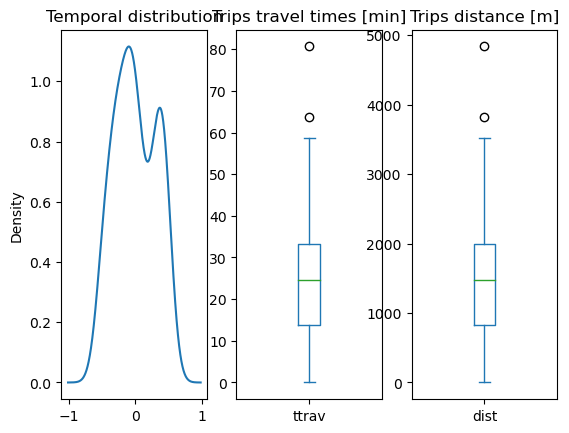

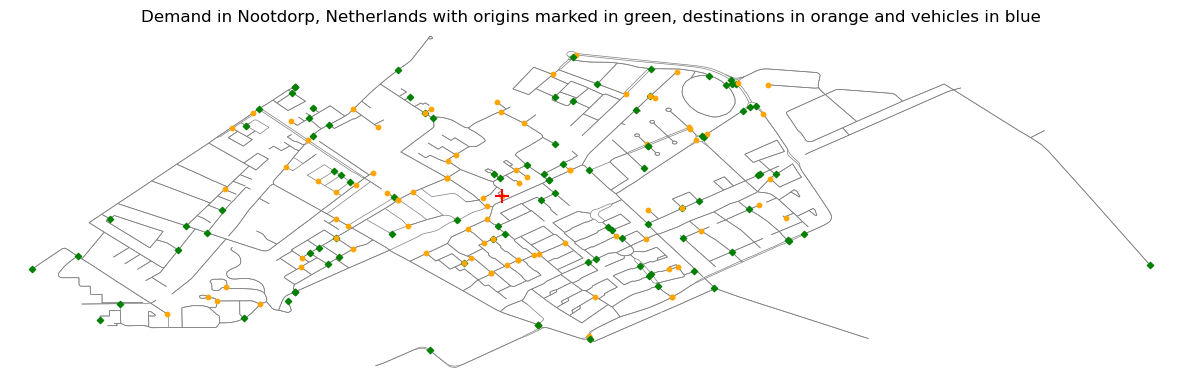

In [31]:
from MaaSSim.visualizations import plot_demand
plot_demand(inData, params = params)

<AxesSubplot: title={'center': 'Trip distances'}, ylabel='Frequency'>

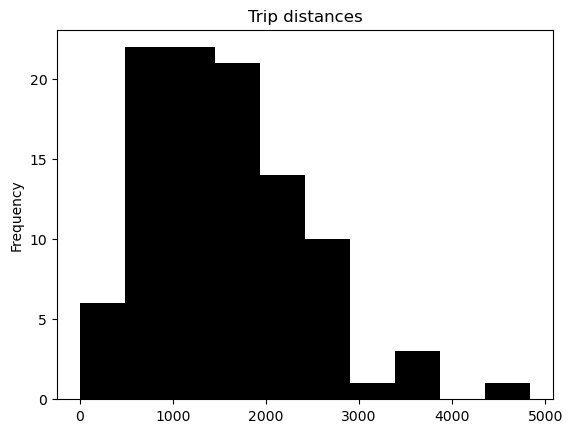

In [32]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

<AxesSubplot: title={'center': 'Origin distances to center'}, ylabel='Frequency'>

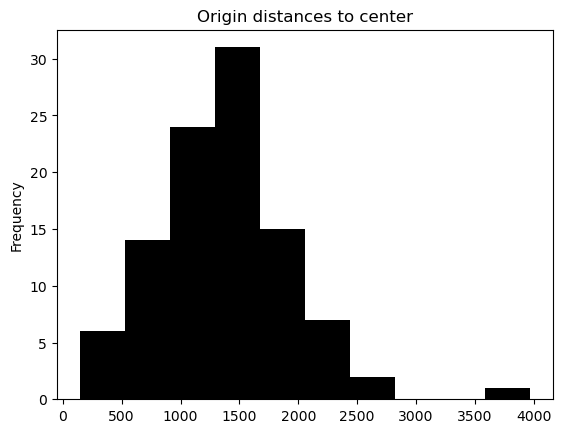

In [33]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

<AxesSubplot: title={'center': 'Origin distances to center'}, ylabel='Frequency'>

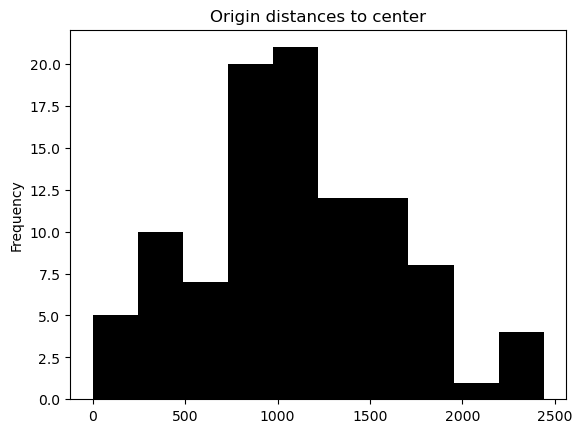

In [34]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl